In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 평균이동(Mean Shift)

## 평균이동 개요

- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행


- 중심을 `데이터가 모여 있는 밀도가 가장 높은 곳`으로 이동시킴
    - K-평균은 중심에 소속된 데이터의 평균거리 중심으로 이동
    
    
- 데이터의 분포도를 이용해 군집 중심점을 찾음


- 군집 중심점은 데이터 포인트가 모여있는 곳으로 생각하고 `확률밀도함수(probability density function)`를 이용
    - 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
    - 주어진 모델의 확률 밀도 함수를 찾기 위해서 `KDE(Kernel Density Estimation)`을 이용
    

### 평균이동 방법
    
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수값으로 입력한 뒤, 그 반환값을 현재 위치에서 업데이트하며 이동하는 방식
- 이 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾음

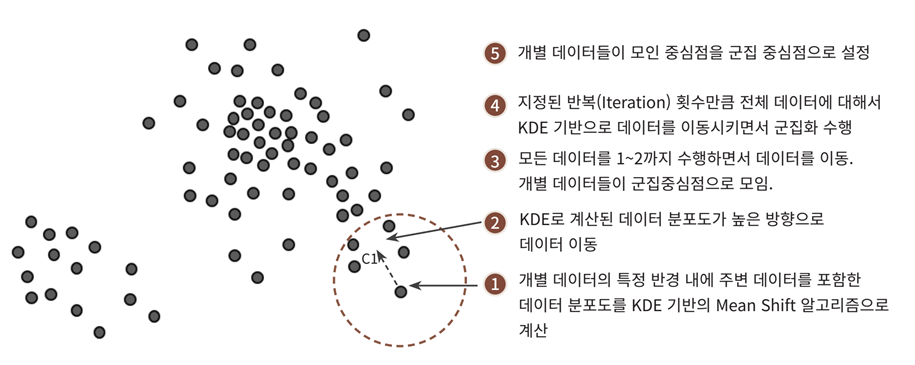

**KDE(Kernel Density Estimation)**
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

    - 확률 밀도 함수(Probability Density Estimation)
        - 확률 변수의 분포

- 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정
- 대표적인 커널 함수 : 가우지안(Gaussian) 분포 함수

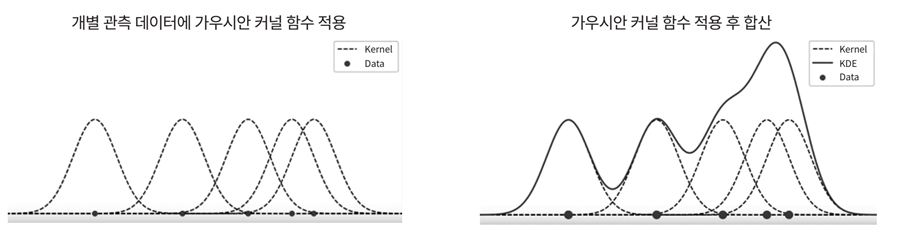

**커널 함수식**
- $K$ : 커널 함수, $x$ : 확률변수값,  $x_i$ : 관측값, $h$ : 대역폭

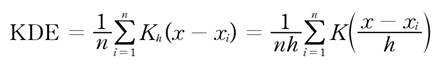

- 대역폭 $h$는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(smoothing)하는데 적용
- h값 크기에 따라 확률밀도 추정 성능을 좌우하게 됨
    - h값이 작을수록 과대적합(overfitting)을 하기 쉬움
    - h값이 클수로 과도하게 평활화된 KDE로 지나치게 단순화되어 과소적합(underfitting)하기 쉬움
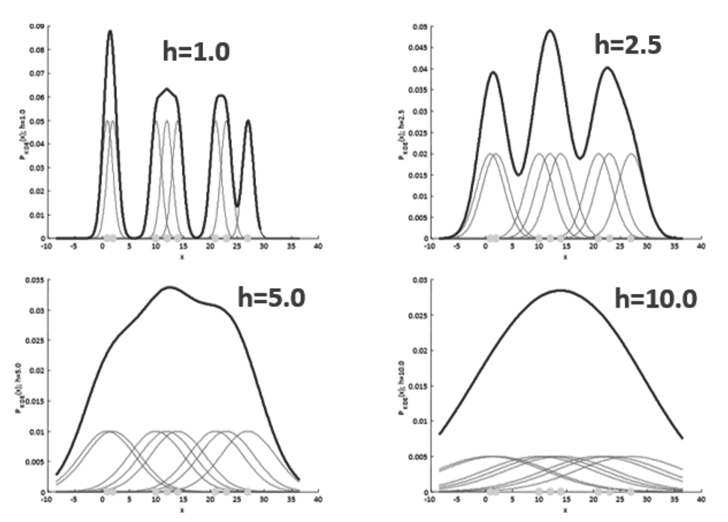
- 적절한 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요함

### 평균 이동 군집화와 대역폭의 관계
- **`대역폭이 클수록`** 평활화된 KDE로 **`적은 수의 군집 중심점`**을 가짐
- **`대역폭이 작을수록` `많은 수의 군집 중심점`**을 가짐

### 사이킷런의 평균 이동 군집화 클래스 MeanShift

**MeanShift(bandwidth)**
- bandwidth : KDE의 대역폭 h와 동일


**estimate_bandwidth() 함수**
- 최적의 대역폭 계산 함수

### 예제
- make_blobs()을 이용하여 cluster_std가 0.7로 정한 3개 군집 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘 적용

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

In [3]:
from sklearn.cluster import MeanShift

In [4]:
ms = MeanShift(bandwidth=0.8)
ms_labels = ms.fit_predict(X)

In [8]:
np.unique(ms_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([57, 60, 51, 15, 10,  7]))

In [17]:
def meanshifting(X, y, bandwidth=1):
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(X)
    print(f'{ms}')
    print(f'cluster labels : \n {np.unique(labels, return_counts=True)}')
    fig, axs = plt.subplots(ncols=2)
    axs[0].scatter(X[:,0], X[:,1], c=y)
    axs[1].scatter(X[:,0], X[:,1], c=labels)
    axs[0].set_title('origin')
    axs[1].set_title(f'bandwidth={bandwidth}')
    plt.tight_layout()
    plt.show()

MeanShift(bandwidth=1)
cluster labels : 
 (array([0, 1, 2]), array([67, 67, 66]))


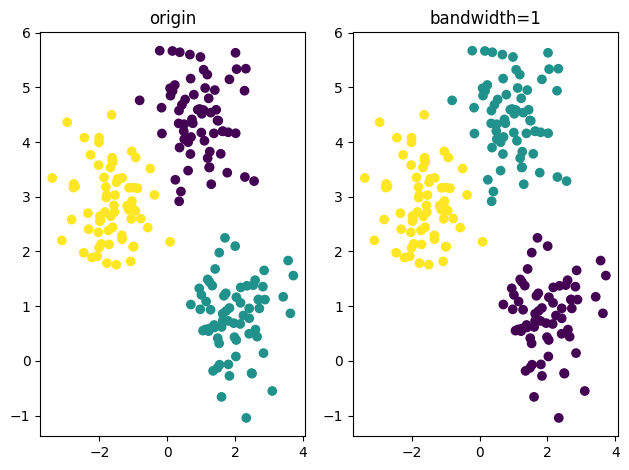

In [18]:
meanshifting(X, y, bandwidth=1)

MeanShift(bandwidth=0.7)
cluster labels : 
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([49, 49, 49, 14,  8, 10,  9,  6,  6]))


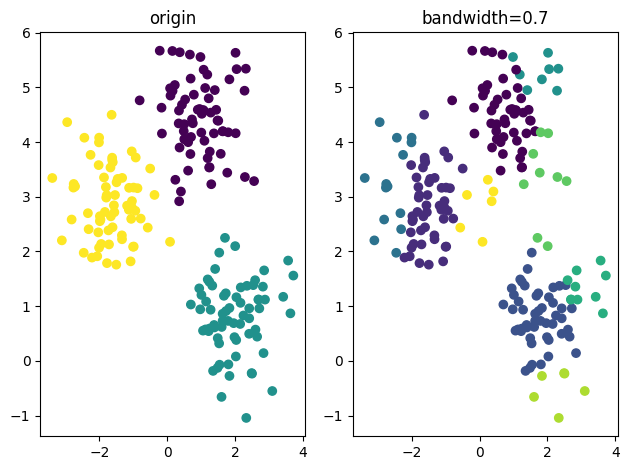

MeanShift(bandwidth=0.8)
cluster labels : 
 (array([0, 1, 2, 3, 4, 5]), array([57, 60, 51, 15, 10,  7]))


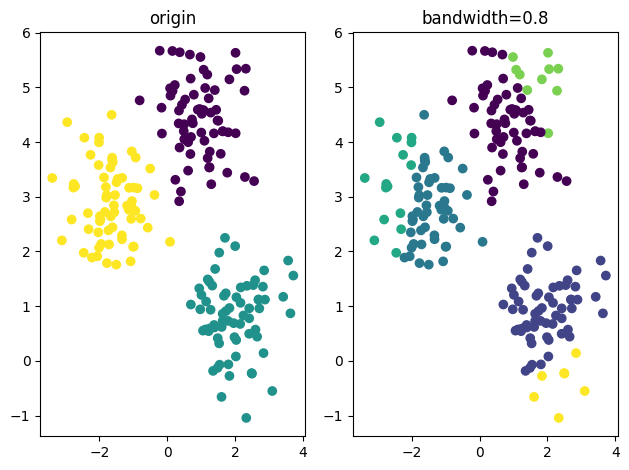

MeanShift(bandwidth=1)
cluster labels : 
 (array([0, 1, 2]), array([67, 67, 66]))


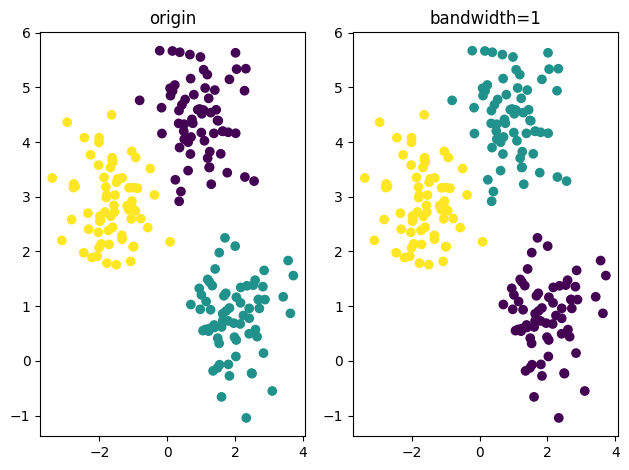

MeanShift(bandwidth=1.2)
cluster labels : 
 (array([0, 1, 2]), array([67, 67, 66]))


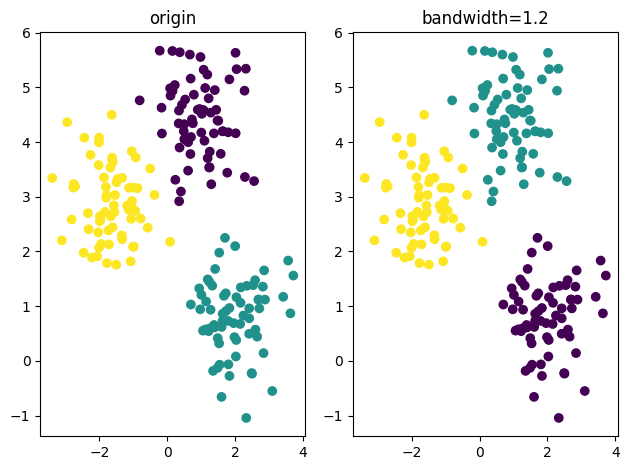

MeanShift(bandwidth=2)
cluster labels : 
 (array([0, 1, 2]), array([66, 67, 67]))


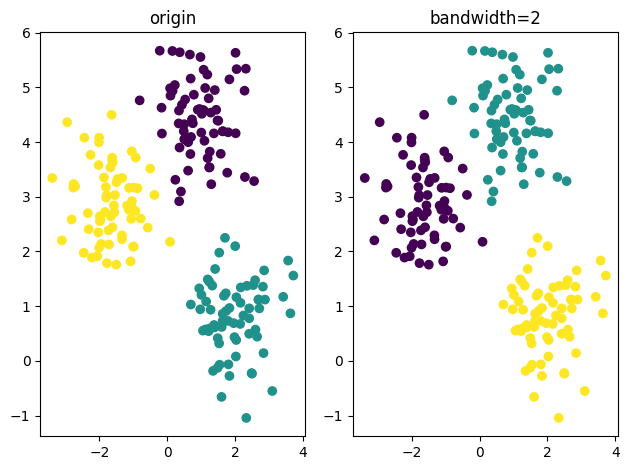

MeanShift(bandwidth=3)
cluster labels : 
 (array([0]), array([200]))


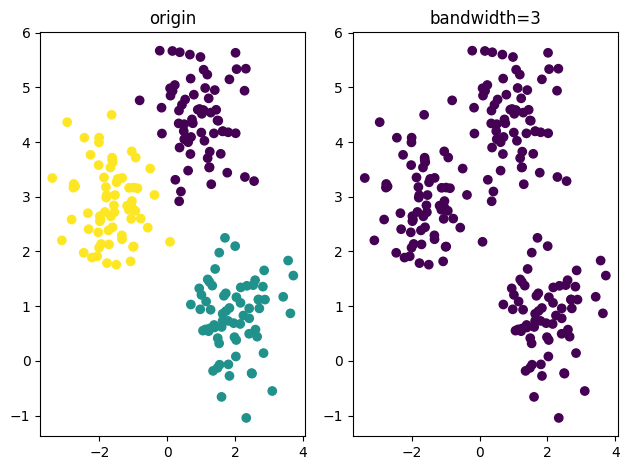

In [19]:
for bw in [0.7,0.8,1,1.2,2,3]:
    meanshifting(X, y, bandwidth=bw)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

- bandwidth를 1로 높여 평균 이동 군집화 수행

bandwidth = 1.2로 지정

bandwidth = 2로 지정

bandwidth = 3로 지정

### 적절한 bandwidth를 찾기 위한 함수 : estimate_bandwidth()

In [21]:
from sklearn.cluster import estimate_bandwidth

best_bw = estimate_bandwidth(X)
print(f'best bandwidth={best_bw}')

best bandwidth=1.8158484154517098


- 적정한 bandwidth를 계산하여 이를 적용한 평균 이동 군집화 수행 

MeanShift(bandwidth=np.float64(1.8158484154517098))
cluster labels : 
 (array([0, 1, 2]), array([67, 67, 66]))


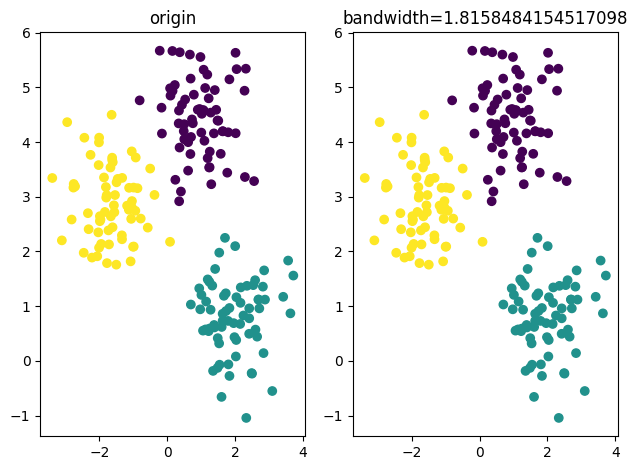

In [22]:
meanshifting(X, y, bandwidth = best_bw)

### 구성된 3개의 군집 시각화

**MeanShift의 cluster_centers_**

**군집 결과 시각화: 군집 중심과 군집별 마커 표시**

- target 값과 군집 label 값 비교

### 평균 이동 군집화의 장단점
**장점**
- 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않으므로 좀 더 유연한 군집화가 가능함
- 이상치의 영향력이 크지 않음
- 미리 군집의 개수를 정할 필요가 없음

**단점**
- 알고리즘 수행 시간이 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼


### 평균이동 군집화 활용 분야
- 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용됨
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘

----